In [1]:
# load_digits()를 통해 이미지 데이터 로드
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
# 첫번째 샘플 출력, 0을 흰색, 0보다 큰 숫자를 검은색 점이라고 볼 수 있음
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
# 첫번째 샘플의 레이블 확인
print(digits.target[0])

0


In [4]:
# 전체 샘플 갯수 확인
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


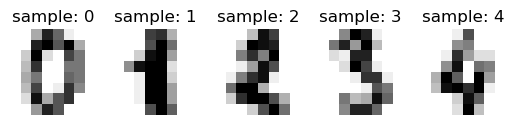

In [5]:
# 전체 샘플 중 상위 5개의 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
        plt.subplot(2, 5, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('sample: %i' % label)

In [6]:
# 상위 5개의 레이블 확인
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [7]:
# digits.data를 이용해 첫번째 샘플 출력
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
# data를 X 에 저장하고 레이블을 Y에 저장
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [9]:
# 도구 임포트
import torch
import torch.nn as nn
from torch import optim

In [10]:
# 모델 정의
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [11]:
# 데이터 로드
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [12]:
# 비용함수 정의
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [13]:
# 옵티마이저 정의
optimizer = optim.Adam(model.parameters())

In [14]:
# 손실값
losses = []

In [16]:
# 훈련 실행
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))
        
        
    losses.append(loss.item())   

Epoch    0/100 Cost: 2.549816
Epoch   10/100 Cost: 2.145753
Epoch   20/100 Cost: 1.895330
Epoch   30/100 Cost: 1.586967
Epoch   40/100 Cost: 1.253022
Epoch   50/100 Cost: 0.902999
Epoch   60/100 Cost: 0.621251
Epoch   70/100 Cost: 0.436426
Epoch   80/100 Cost: 0.325051
Epoch   90/100 Cost: 0.256465


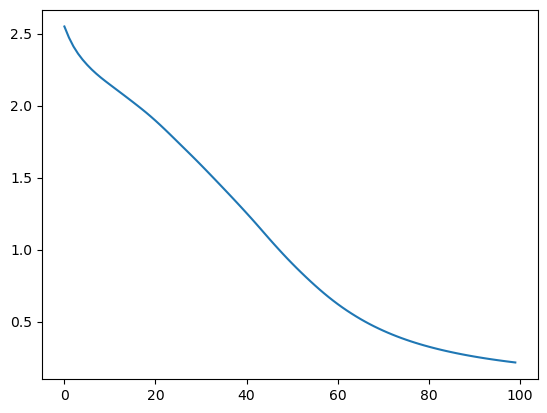

In [17]:
# 손실값 확인
plt.plot(losses)

In [18]:
# 모델 테스트
import random
r = random.randint(0, len(X) - 1)
index = r
model.eval()
data = X[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

예측 결과 : 5
이 이미지 데이터의 정답 레이블은 5입니다


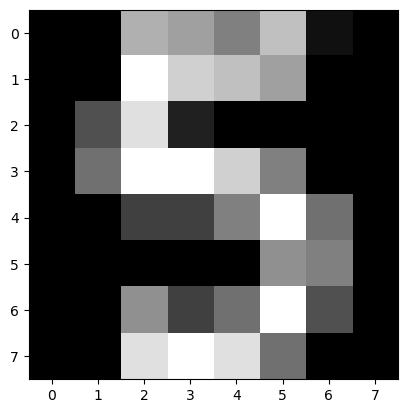

In [19]:
print("예측 결과 : {}".format(predicted))
X_test_show = (X[index]).numpy()
plt.imshow(X_test_show.reshape(8, 8), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(Y[index]))